In [1]:
import numpy as np
import pandas as pd
import torch
import random
from tqdm import tqdm
from sklearn.metrics import f1_score
from os import path
from os import listdir
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from math import log2, e
from sklearn.metrics import accuracy_score



In [2]:
import torchvision.datasets

In [3]:
train_mnist = torchvision.datasets.MNIST('./', download=True, train=True)
test_mnist = torchvision.datasets.MNIST('./', download=True, train=False)
X_train = train_mnist.train_data
Y_train = train_mnist.train_labels
X_test = test_mnist.train_data
Y_test = test_mnist.train_labels

C:\Users\ASUS\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\ASUS\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


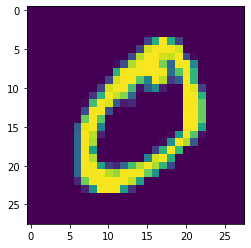

tensor(0)

In [4]:
plt.imshow(X_train[1, :, :])
plt.show()
Y_train[1]

In [5]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [6]:
class View(torch.nn.Module):
    def forward(self, X):
        return X.view(X.size(0), X.size(1) * X.size(2) * X.size(3))
    
model1 = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    torch.nn.ReLU(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0),
    torch.nn.ReLU(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    View(),

    torch.nn.Linear(400, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 84),
    torch.nn.ReLU(),
    torch.nn.Linear(84, 10)
)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model1 = model1.to(device)

In [7]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.001)

In [11]:
batch = 100
X_train = X_train.to(device)
X_test = X_test.to(device)

accuracy_array = []
loss_array = []

for epoch in tqdm(range(100)):
    for i in range(600):
        indexes = np.random.randint(0, 60000, batch)
        optimizer.zero_grad()
        y_pred = model1(X_train[indexes])
        loss_value = loss(y_pred, Y_train[indexes])
        loss_value.backward()
        optimizer.step()
    y_pred = model1(X_test)
    y_pred = y_pred.cpu()
    loss_array.append(loss(y_pred, Y_test))
    y_pred = y_pred.detach().numpy()
    y_pred_real = [0] * len(y_pred)
    for i in range(len(y_pred)):
        y_pred_real[i] = y_pred[i].argmax()
    accuracy_array.append(accuracy_score(Y_test.detach().numpy(), y_pred_real))
    print(accuracy_score(Y_test.detach().numpy(), y_pred_real))



  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

  1%|▊                                                                                 | 1/100 [00:29<48:11, 29.21s/it]

0.9886


RuntimeError: CUDA out of memory. Tried to allocate 180.00 MiB (GPU 0; 2.00 GiB total capacity; 955.45 MiB already allocated; 82.88 MiB free; 1.03 GiB reserved in total by PyTorch)